# PROBLEM STATEMENT

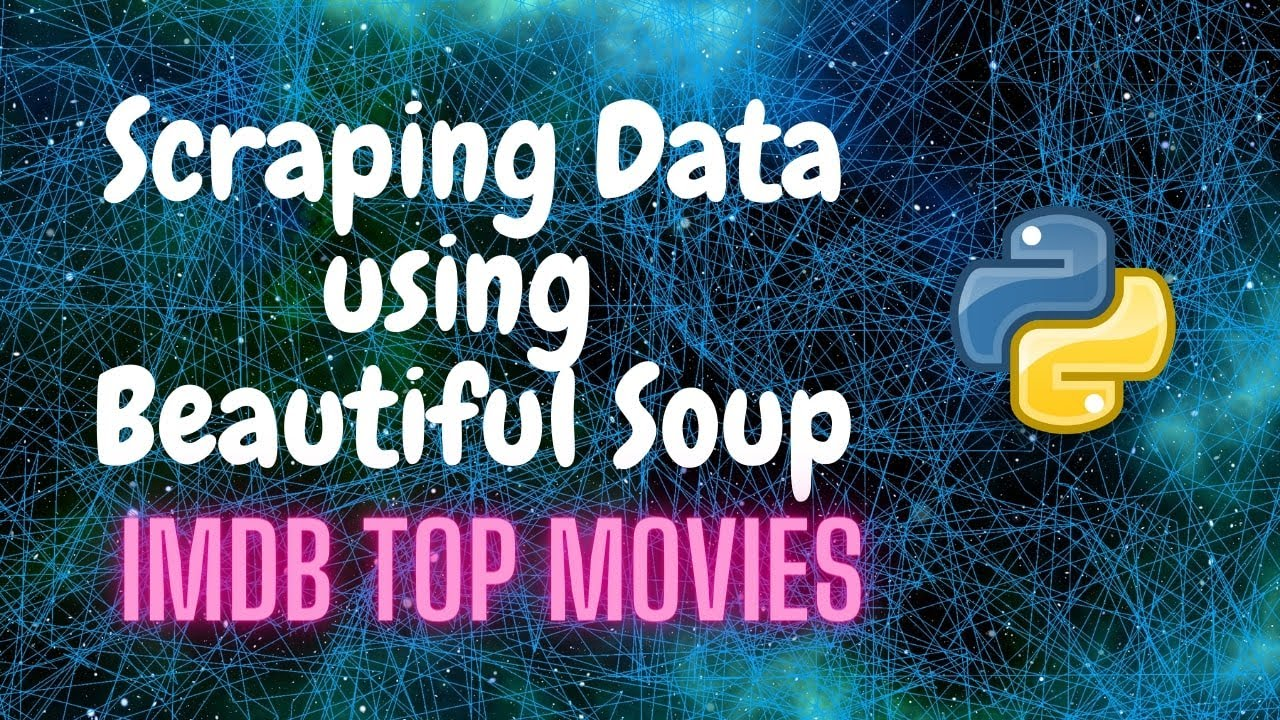

# IMPORTANT USEFUL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

# GATHERING DATA FROM WEBSITE:

In [2]:
url="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start="
n=[]           #name of the movies
y=[]           # release year
C=[]           #certificate for age restrictios
LM=[]          #length of the movies
CG=[]          #catogries
rt=[]          #imdb reating
D=[]           #director
A=[]           #actor
V=[]           #votes by peoples
G=[]           #total income(Gross)
M=[]           #meta score

for i in range(1,401,50):
    urls=url+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all("div",attrs={'class':"lister-item-content"}):
        # name
        name=i.find("h3",class_="lister-item-header")
        if name is None:
            n.append(np.nan)
            
        else:
            n.append(name.text.split("\n")[2])

         #year   
        release=i.find("h3",class_="lister-item-header")
        b=re.findall(r"(\d{4})",release.text)
        if len(b)>0 == None:
            y.append(np.nan)
        else:
            y.append(b[0])

   # certificate
        
        cerificate=i.find("span",class_="certificate")
        if cerificate is None:
            C.append(np.nan)
            
        else:
            C.append(cerificate.text)
            
            
        #length of movies
        
        length=i.find("span",class_="runtime")
        if length is None:
            LM.append(np.nan)
        else:
            LM.append(length.text)
        
 
       # catogary
        catogries=i.find("span",class_="genre")
        
        if catogries is None:
            CG.append(np.nan)
        else:
            CG.append(catogries.text.split("\n")[1])

        #rating
        
        rating=i.find("div",class_="ratings-bar")
        if rating is None:
            rt.append(np.nan)
        else:
            rt.append(rating.text.split("\n")[3])
            
        #director
        
        diractor=i.find("p",class_="")
        if diractor is None:
            D.append(np.nan)
        else:
            D.append(diractor.text.split("\n")[2])
            
        #actor
        
        actor=i.find("p",class_="")
        if actor is None:
            A.append(np.nan)
        else:
            A.append(actor.text.split("\n")[5:9])

        #votes
        
        votes=i.find("p",class_="sort-num_votes-visible")
        if votes is None:
            V.append(np.nan)
        else:
            V.append(votes.text.split("\n")[2])
  
        #Gross
      
        x=i.find("p",class_="sort-num_votes-visible")
        b=re.findall("Gross:\n(.*)",x.text)
        if len(b)==0:
            G.append(np.nan)
        else:
            G.append(b[0])
            
        #METASCORE
        
        Meta=i.find("div",class_="inline-block ratings-metascore")
        if Meta is None:
            M.append(np.nan)
        else:
            M.append(Meta.text.split("\n")[1].replace(" ",""))
        


https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=1
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=51
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=101
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=151
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=201
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=251
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=301
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=351


# CONVERTING DATA INTO DATAFRAME

In [280]:
page_df=pd.DataFrame({"Movies Name":n,"Movies Release Year":y,"Certificate":C,
                      "Length OF Movies":LM,"Categories Of The Movies":CG,
                      "IMDB RATING":rt ,"Diractor Name":D ,"Actor Name":A ,
                        "Votes":V, "Total Gross":G  ,"METASCORE":M })

In [281]:
page_df

,Movies Name,Movies Release Year,Certificate,Length OF Movies,Categories Of The Movies,IMDB RATING,Diractor Name,Actor Name,Votes,Total Gross,METASCORE
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Frank Darabont,"[Tim Robbins, , Morgan Freeman, , Bob Gunton, ...","2,603,941",$28.34M,81
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,Francis Ford Coppola,"[Marlon Brando, , Al Pacino, , James Caan, , D...","1,799,298",$134.97M,100
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"[Christian Bale, , Heath Ledger, , Aaron Eckha...","2,575,452",$534.86M,84
3,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",9.0,Peter Jackson,"[Elijah Wood, , Viggo Mortensen, , Ian McKelle...","1,788,050",$377.85M,94
4,Schindler's List,1993,A,195 min,"Biography, Drama, History",9.0,Steven Spielberg,"[Liam Neeson, , Ralph Fiennes, , Ben Kingsley,...","1,324,034",$96.90M,94
...,...,...,...,...,...,...,...,...,...,...,...
395,Secrets & Lies,1996,U,136 min,"Comedy, Drama",8.0,Mike Leigh,"[Timothy Spall, , Brenda Blethyn, , Phyllis Lo...","42,982",$13.42M,91
396,Twelve Monkeys,1995,A,129 min,"Mystery, Sci-Fi, Thriller",8.0,Terry Gilliam,"[Bruce Willis, , Madeleine Stowe, , Brad Pitt,...","610,916",$57.14M,74
397,Dilwale Dulhania Le Jayenge,1995,U,189 min,"Drama, Romance",8.0,Aditya Chopra,"[Shah Rukh Khan, , Kajol, , Amrish Puri, , Far...","68,626",NaN,NaN
398,Chung Hing sam lam,1994,U,102 min,"Comedy, Crime, Drama",8.0,Kar-Wai Wong,"[Brigitte Lin, , Takeshi Kaneshiro, , Tony Chi...","78,934",$0.60M,78


In [282]:
#x=pd.read_csv("real_project.csv")

# DATA CLEANING

In [283]:
page_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movies Name               400 non-null    object
 1   Movies Release Year       400 non-null    object
 2   Certificate               350 non-null    object
 3   Length OF Movies          400 non-null    object
 4   Categories Of The Movies  400 non-null    object
 5   IMDB RATING               400 non-null    object
 6   Diractor Name             400 non-null    object
 7   Actor Name                400 non-null    object
 8   Votes                     400 non-null    object
 9   Total Gross               321 non-null    object
 10  METASCORE                 306 non-null    object
dtypes: object(11)
memory usage: 34.5+ KB


# Missing Values Treatment

In [284]:
page_df.isnull().sum()

Movies Name                  0
Movies Release Year          0
Certificate                 50
Length OF Movies             0
Categories Of The Movies     0
IMDB RATING                  0
Diractor Name                0
Actor Name                   0
Votes                        0
Total Gross                 79
METASCORE                   94
dtype: int64

In [285]:
page_df["METASCORE"] = page_df["METASCORE"].replace( np.nan  , 0 )
page_df["Total Gross"] = page_df["Total Gross"].replace( np.nan  , 0)
page_df["Certificate"] = page_df["Certificate"].replace( np.nan  , "" )

In [286]:
page_df.isnull().sum()

Movies Name                 0
Movies Release Year         0
Certificate                 0
Length OF Movies            0
Categories Of The Movies    0
IMDB RATING                 0
Diractor Name               0
Actor Name                  0
Votes                       0
Total Gross                 0
METASCORE                   0
dtype: int64

In [287]:
page_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movies Name               400 non-null    object
 1   Movies Release Year       400 non-null    object
 2   Certificate               400 non-null    object
 3   Length OF Movies          400 non-null    object
 4   Categories Of The Movies  400 non-null    object
 5   IMDB RATING               400 non-null    object
 6   Diractor Name             400 non-null    object
 7   Actor Name                400 non-null    object
 8   Votes                     400 non-null    object
 9   Total Gross               400 non-null    object
 10  METASCORE                 400 non-null    object
dtypes: object(11)
memory usage: 34.5+ KB


# Type Casting

In [288]:
page_df["Votes"][0].replace(",","")

'2603941'

In [289]:
v=[]
for i in page_df["Votes"]:
    v.append(i.replace(",",""))
page_df["Votes"]=v

In [290]:
page_df["Votes"]=page_df["Votes"].astype("int")

In [291]:
page_df["METASCORE"]=page_df["METASCORE"].astype("int")

In [292]:
page_df["IMDB RATING"]=page_df["IMDB RATING"].astype("float")

In [293]:
#$28.34M

In [294]:
page_df["Total Gross"][0].replace("$","").replace("M","")

'28.34'

In [295]:
p=[]
for i in page_df["Total Gross"]:
    if i==0:
        p.append(0)
    else:
        
        p.append(i.replace("$", " ").replace("M"," "))
page_df["Total Gross"]=p

In [296]:
len(p)

400

In [297]:
page_df["Total Gross"]=page_df["Total Gross"].astype("float")

In [298]:
page_df["Length OF Movies"][0].replace("min","")

'142 '

In [299]:
l=[]
for i in page_df["Length OF Movies"]:
    l.append(i.replace("min",""))
page_df["Length OF Movies"]=l

In [300]:
page_df["Length OF Movies"]=page_df["Length OF Movies"].astype("int")

In [301]:
page_df["Movies Release Year"][0].replace("(","").replace(")","")

'1994'

In [302]:
y=[]
for i in page_df["Movies Release Year"]:
    y.append(i.replace("(","").replace(")",""))
page_df["Movies Release Year"]=y

In [303]:
page_df["Movies Release Year"]=pd.to_datetime(page_df["Movies Release Year"])

### After chenging the Dtype of [ Length OF Movies,IMDB Rating,Votes,Total Gross,Metascore ]

In [304]:
page_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movies Name               400 non-null    object        
 1   Movies Release Year       400 non-null    datetime64[ns]
 2   Certificate               400 non-null    object        
 3   Length OF Movies          400 non-null    int32         
 4   Categories Of The Movies  400 non-null    object        
 5   IMDB RATING               400 non-null    float64       
 6   Diractor Name             400 non-null    object        
 7   Actor Name                400 non-null    object        
 8   Votes                     400 non-null    int32         
 9   Total Gross               400 non-null    float64       
 10  METASCORE                 400 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 29.8+ KB


# Data Analysis

In [305]:
page_df.describe()

,Length OF Movies,IMDB RATING,Votes,Total Gross,METASCORE
count,400.000000,400.000000,4.000000e+02,400.000000,400.000000
mean,131.615000,8.228250,4.516905e+05,63.967250,62.330000
std,31.150967,0.222262,4.787127e+05,118.775121,35.960172
min,45.000000,8.000000,2.535900e+04,0.000000,0.000000
25%,110.000000,8.100000,7.766725e+04,0.170000,58.000000
50%,128.000000,8.200000,2.419900e+05,6.045000,77.000000
75%,148.250000,8.300000,7.369570e+05,70.610000,88.000000
max,321.000000,9.300000,2.603941e+06,858.370000,100.000000


In [306]:
page_df[page_df["Diractor Name"]=="Frank Darabont"]

,Movies Name,Movies Release Year,Certificate,Length OF Movies,Categories Of The Movies,IMDB RATING,Diractor Name,Actor Name,Votes,Total Gross,METASCORE
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Frank Darabont,"[Tim Robbins, , Morgan Freeman, , Bob Gunton, ...",2603941,28.34,81
25,The Green Mile,1999-01-01,UA,189,"Crime, Drama, Fantasy",8.6,Frank Darabont,"[Tom Hanks, , Michael Clarke Duncan, , David M...",1265960,136.80,61


In [307]:
page_df["Votes"].max()

2603941

In [308]:
page_df

,Movies Name,Movies Release Year,Certificate,Length OF Movies,Categories Of The Movies,IMDB RATING,Diractor Name,Actor Name,Votes,Total Gross,METASCORE
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Frank Darabont,"[Tim Robbins, , Morgan Freeman, , Bob Gunton, ...",2603941,28.34,81
1,The Godfather,1972-01-01,A,175,"Crime, Drama",9.2,Francis Ford Coppola,"[Marlon Brando, , Al Pacino, , James Caan, , D...",1799298,134.97,100
2,The Dark Knight,2008-01-01,UA,152,"Action, Crime, Drama",9.0,Christopher Nolan,"[Christian Bale, , Heath Ledger, , Aaron Eckha...",2575452,534.86,84
3,The Lord of the Rings: The Return of the King,2003-01-01,U,201,"Action, Adventure, Drama",9.0,Peter Jackson,"[Elijah Wood, , Viggo Mortensen, , Ian McKelle...",1788050,377.85,94
4,Schindler's List,1993-01-01,A,195,"Biography, Drama, History",9.0,Steven Spielberg,"[Liam Neeson, , Ralph Fiennes, , Ben Kingsley,...",1324034,96.90,94
...,...,...,...,...,...,...,...,...,...,...,...
395,Secrets & Lies,1996-01-01,U,136,"Comedy, Drama",8.0,Mike Leigh,"[Timothy Spall, , Brenda Blethyn, , Phyllis Lo...",42982,13.42,91
396,Twelve Monkeys,1995-01-01,A,129,"Mystery, Sci-Fi, Thriller",8.0,Terry Gilliam,"[Bruce Willis, , Madeleine Stowe, , Brad Pitt,...",610916,57.14,74
397,Dilwale Dulhania Le Jayenge,1995-01-01,U,189,"Drama, Romance",8.0,Aditya Chopra,"[Shah Rukh Khan, , Kajol, , Amrish Puri, , Far...",68626,0.00,0
398,Chung Hing sam lam,1994-01-01,U,102,"Comedy, Crime, Drama",8.0,Kar-Wai Wong,"[Brigitte Lin, , Takeshi Kaneshiro, , Tony Chi...",78934,0.60,78


In [309]:
page_df["Length OF Movies"].max()

321

In [310]:
page_df["Total Gross"].max()

858.37

In [311]:
page_df["year"]=page_df["Movies Release Year"].dt.year

In [312]:
page_df.head(2)

,Movies Name,Movies Release Year,Certificate,Length OF Movies,Categories Of The Movies,IMDB RATING,Diractor Name,Actor Name,Votes,Total Gross,METASCORE,year
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Frank Darabont,"[Tim Robbins, , Morgan Freeman, , Bob Gunton, ...",2603941,28.34,81,1994
1,The Godfather,1972-01-01,A,175,"Crime, Drama",9.2,Francis Ford Coppola,"[Marlon Brando, , Al Pacino, , James Caan, , D...",1799298,134.97,100,1972


In [313]:
page_df["year"].value_counts().sort_values(ascending=True)

2049     1
1917     1
1964     1
1930     1
1934     1
        ..
2019    11
1995    11
2015    11
2014    12
2004    13
Name: year, Length: 92, dtype: int64

# BAR GRAPH

In [314]:
top_movies=page_df.sort_values(["Total Gross","Votes"],ascending=False)[["Movies Name","Total Gross","Votes"]].head(10)# sorting

In [315]:
top_movies2=page_df.sort_values(["Total Gross"],ascending=False).head(10)

Text(0, 0.5, 'Movies')

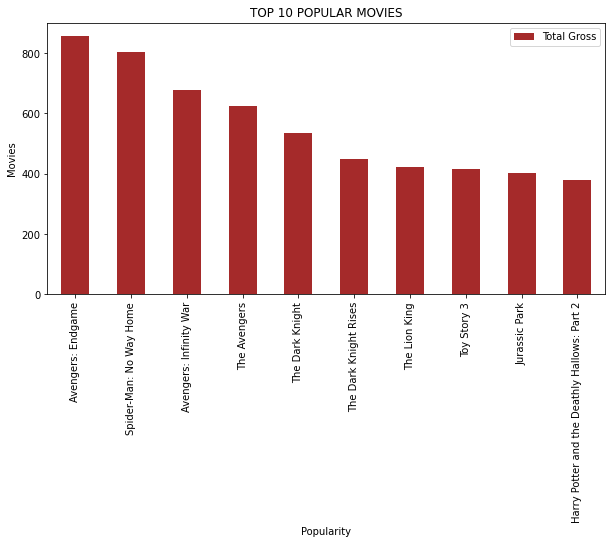

In [316]:
top_movies2.plot(kind="bar",x="Movies Name",y="Total Gross",figsize=(10,5),color="brown",rot=90)
plt.title("TOP 10 POPULAR MOVIES")
plt.xlabel("Popularity")
plt.ylabel("Movies")

# BAR GRAPH

In [317]:
OR=page_df["year"].value_counts().index.tolist()

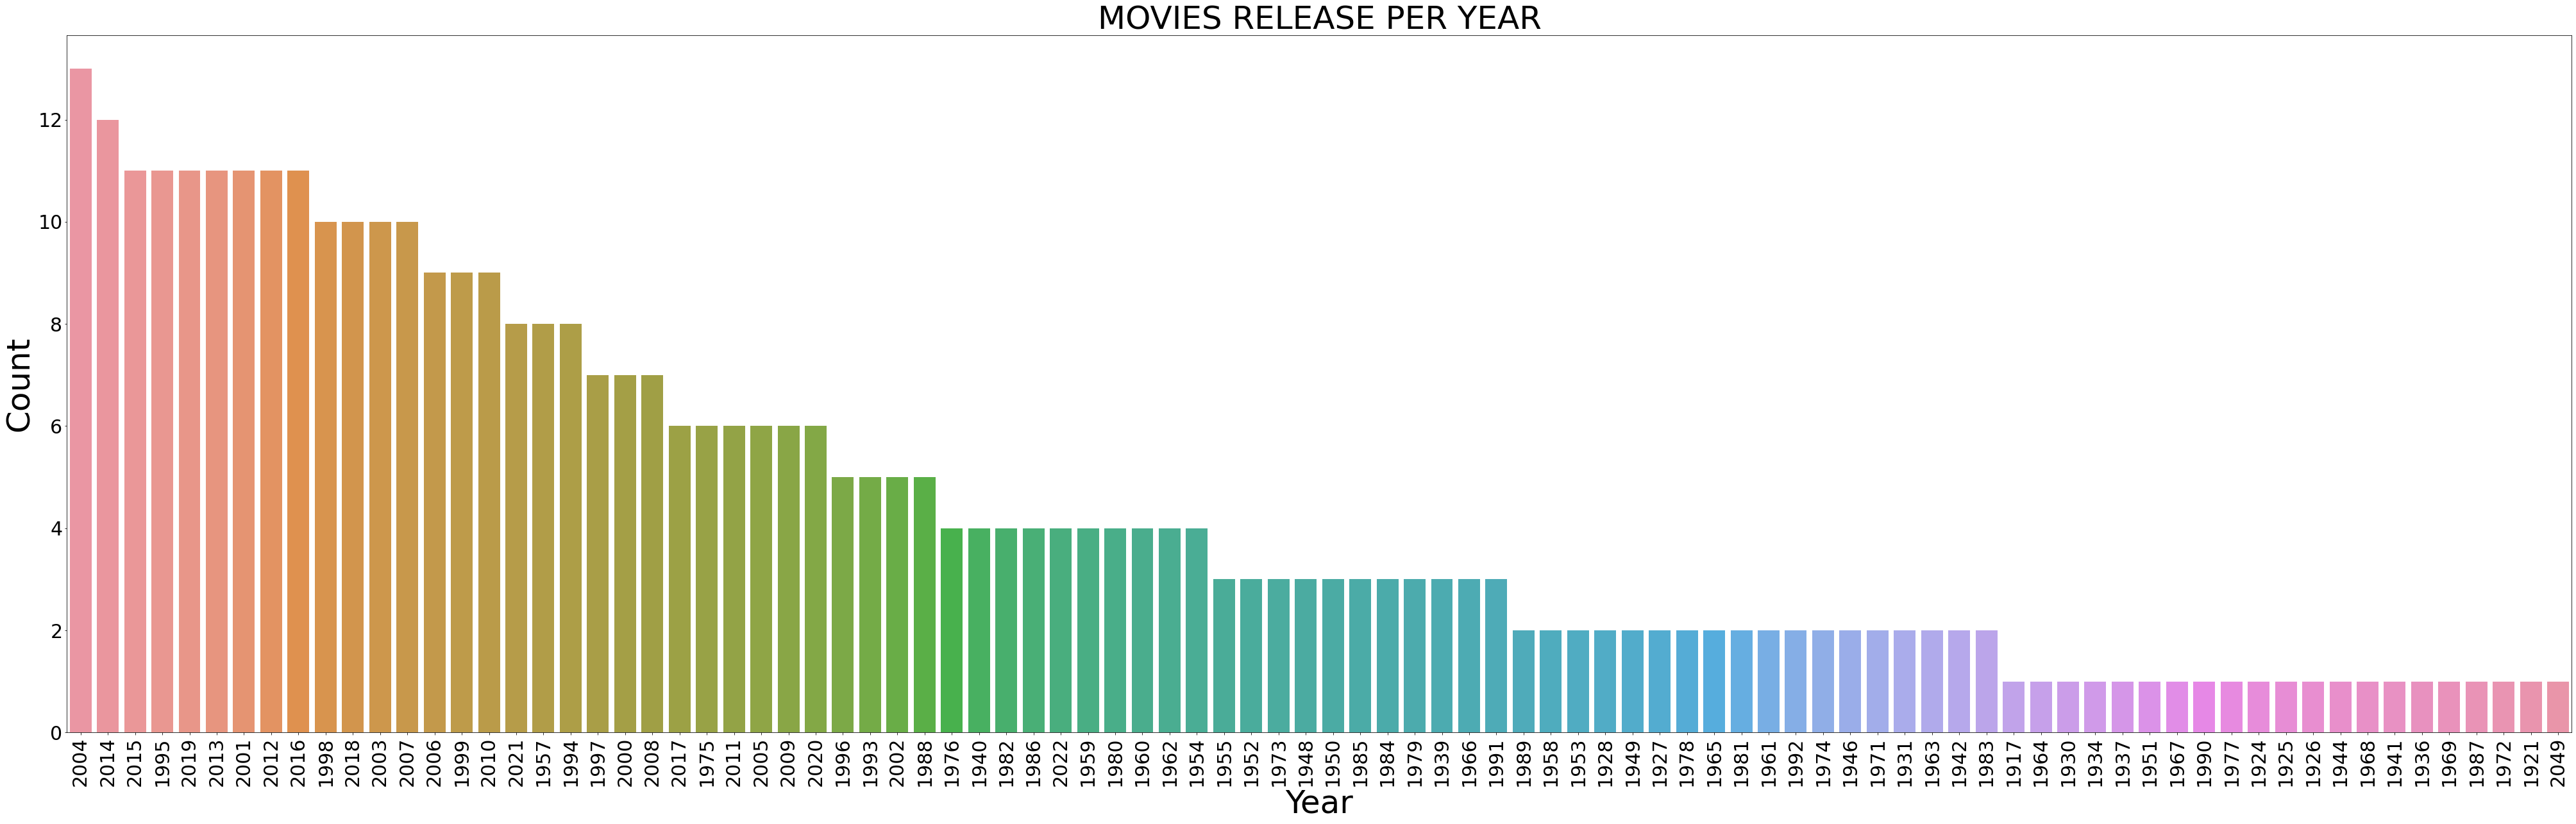

In [318]:
plt.figure(figsize=(70,20))
sns.countplot(x='year',data=page_df,order=OR)
plt.title("MOVIES RELEASE PER YEAR",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=50)
plt.xlabel("Year",fontsize=50)
plt.show()

# BOXPLOT

C:\Users\Afzal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


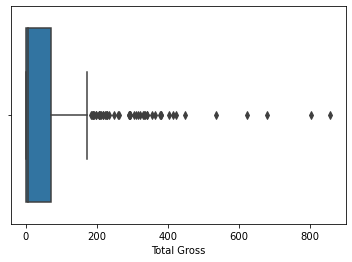

In [319]:
sns.boxplot(page_df['Total Gross'])
plt.show()

# HEAT MAP

<AxesSubplot:>

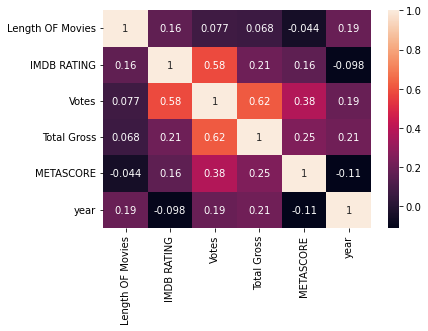

In [320]:
sns.heatmap(page_df.corr(),annot=True)

# displot

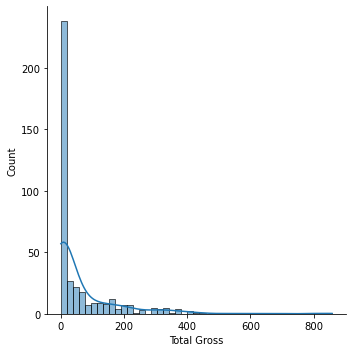

In [321]:
sns.displot(page_df['Total Gross'],kde="True")

# BAR GRAPH

In [322]:
z=page_df.head(50)# converted orignal data frame into sort dataframe(z)

In [323]:
df=z.sort_values("Total Gross")

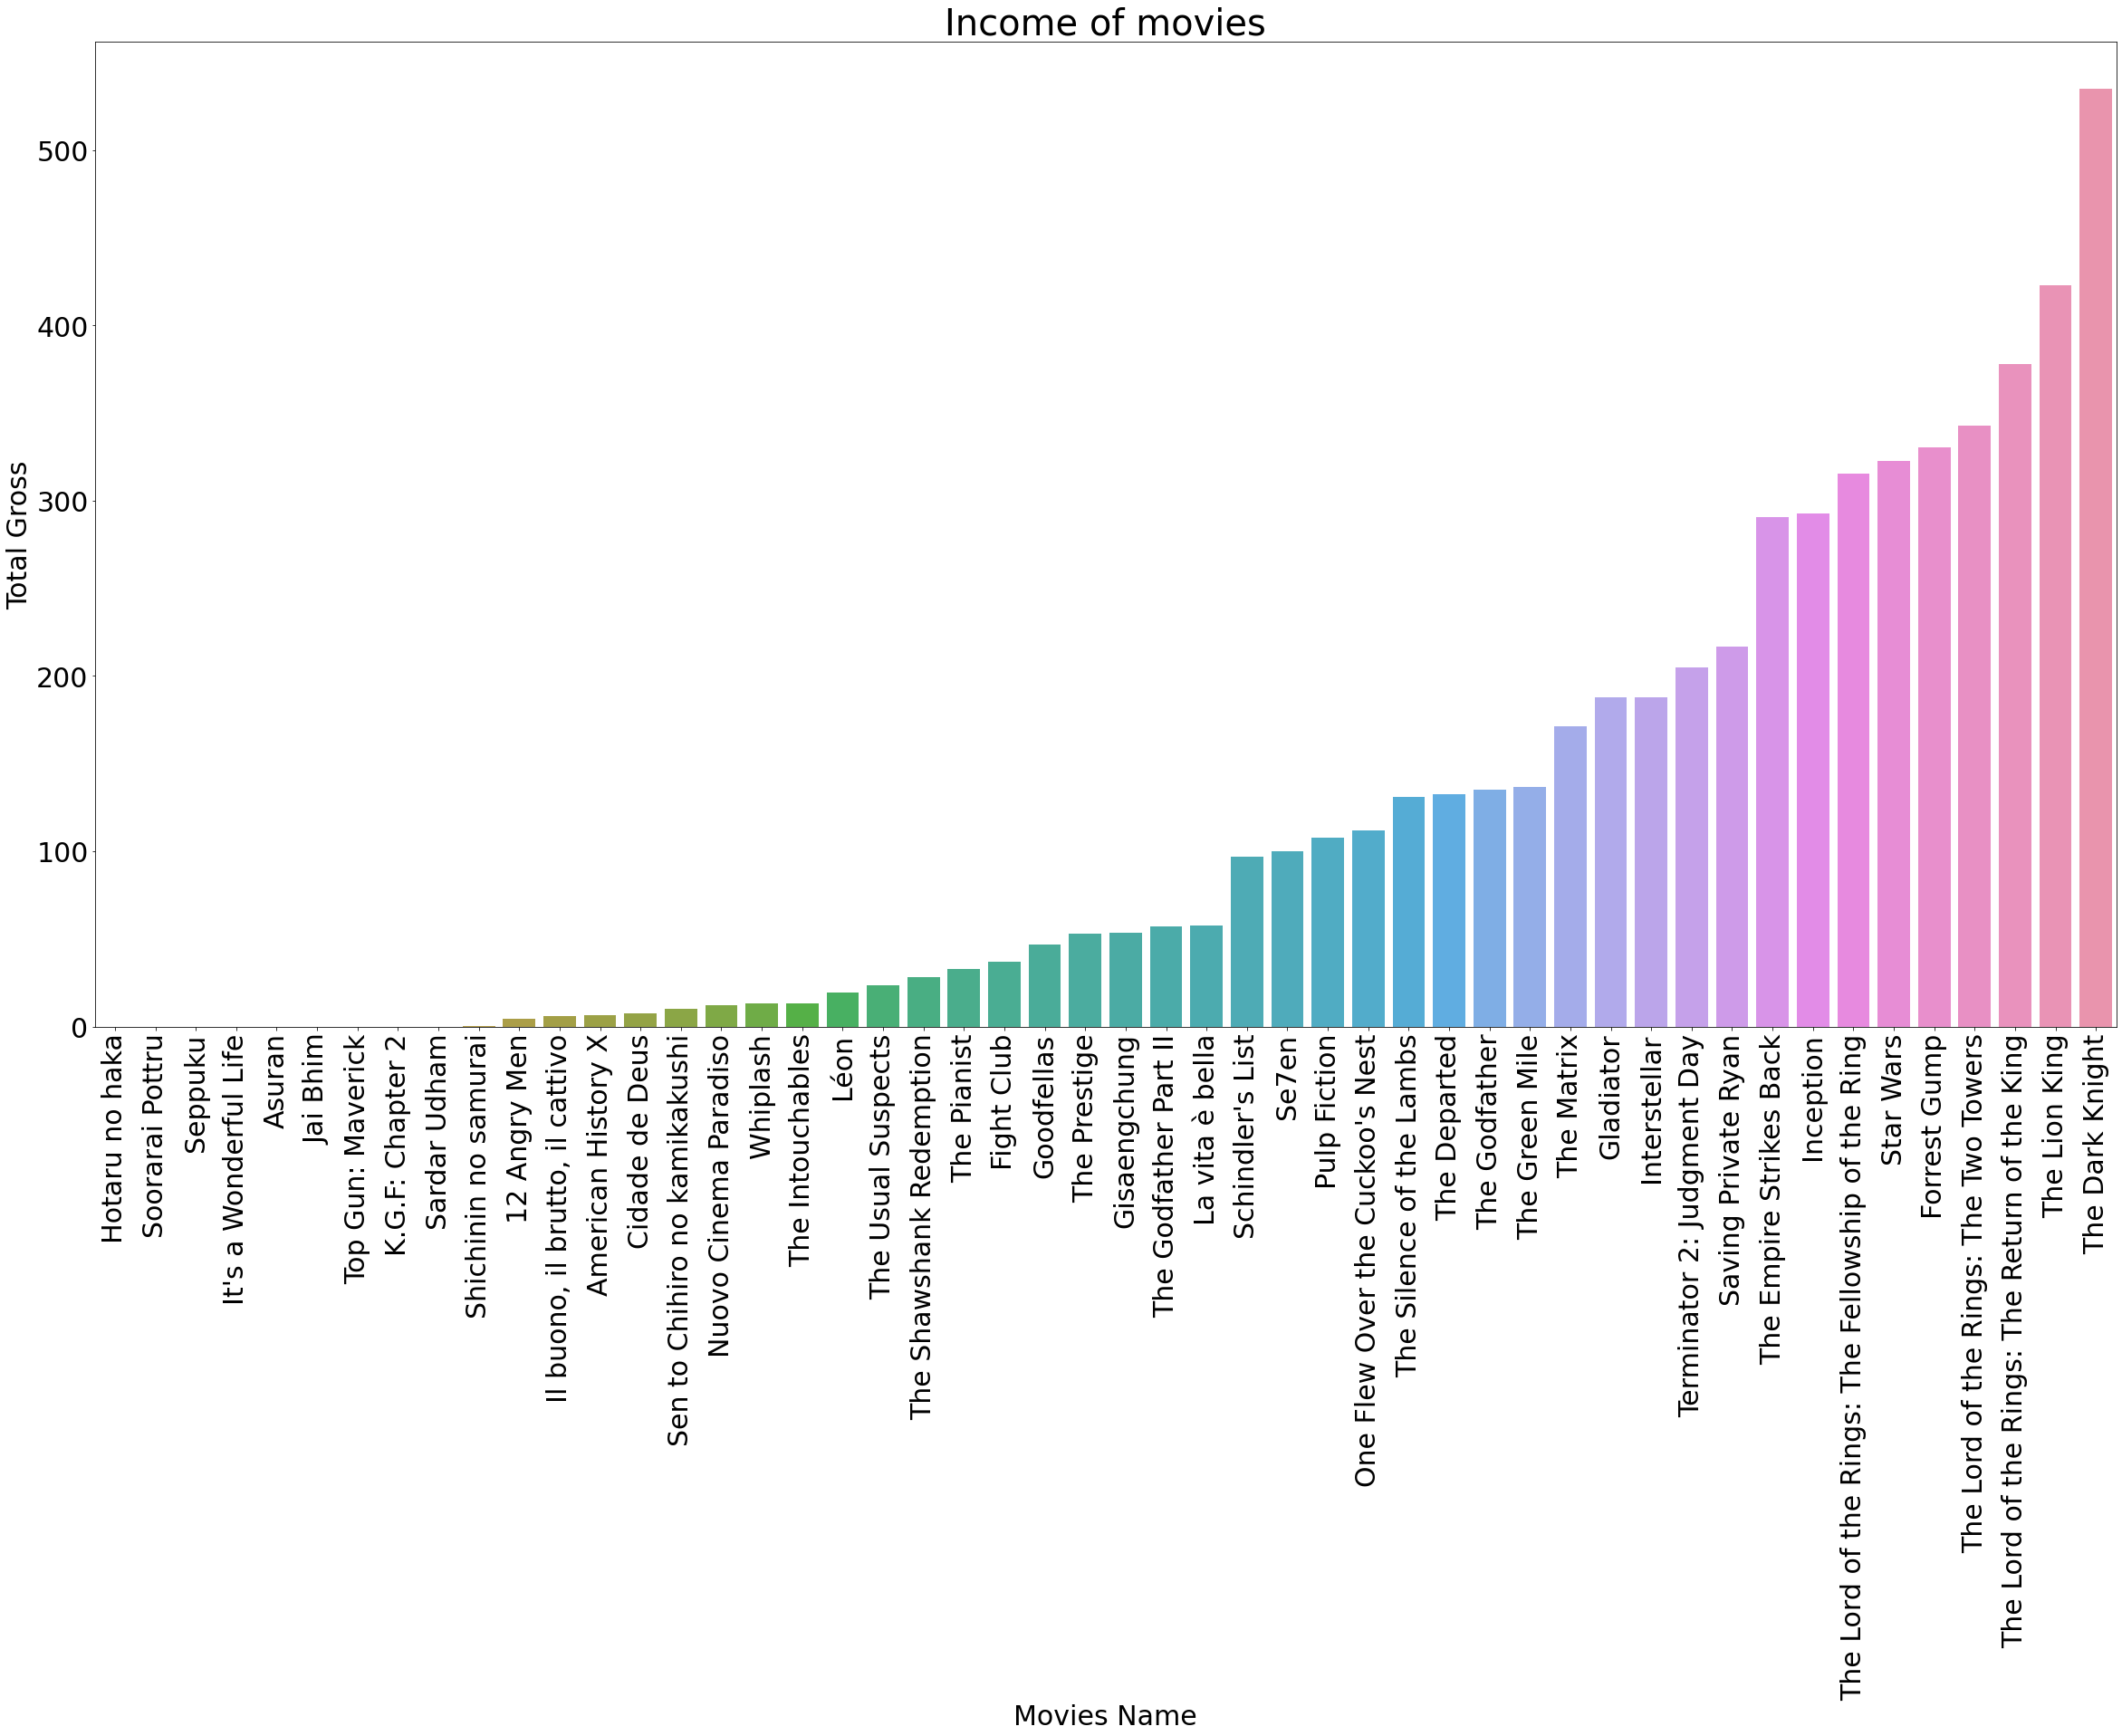

In [324]:
plt.figure(figsize=(40,20))
sns.barplot(x="Movies Name",y="Total Gross",data=df)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Income of movies",fontsize=40)
plt.xlabel("Movies Name",fontsize=30)
plt.ylabel("Total Gross",fontsize=30)
plt.show()

In [325]:
#page_df[page_df["Movies Name"]=="The Shawshank Redemption"]

In [326]:
z=z.sort_values("Votes")

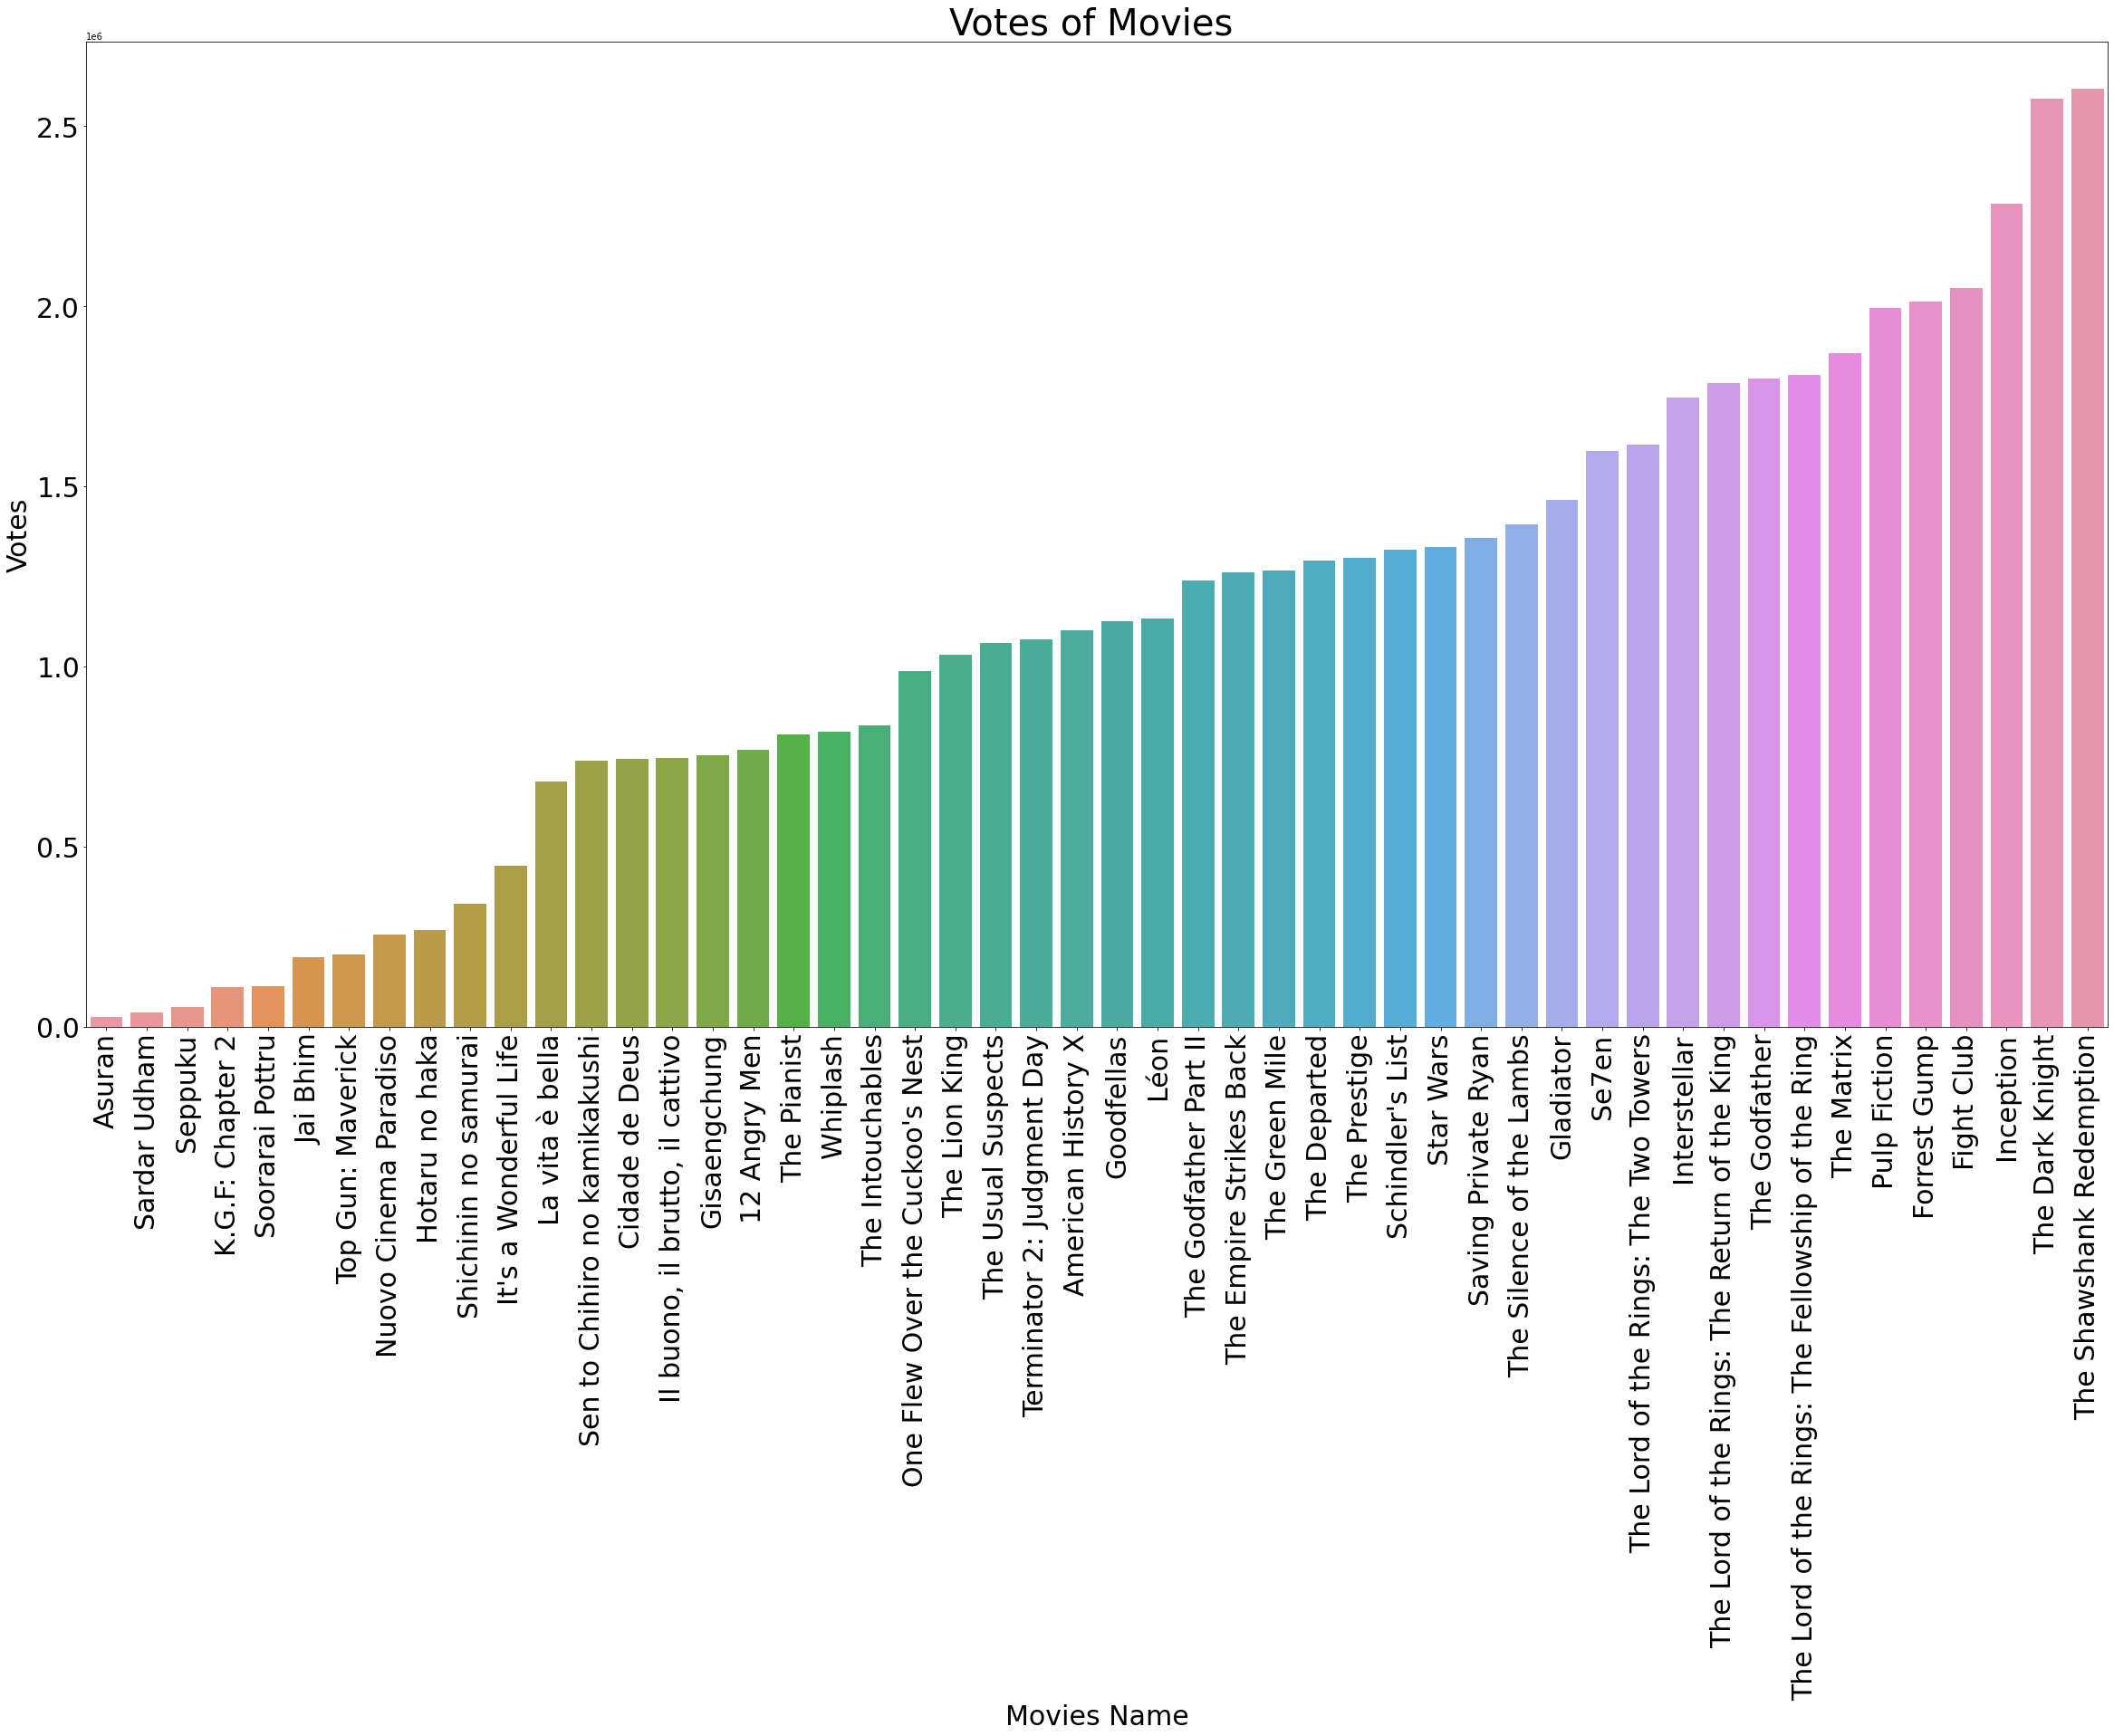

In [327]:

plt.figure(figsize=(40,20))
sns.barplot(x="Movies Name",y="Votes",data=z)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Votes of Movies ",fontsize=40)
plt.xlabel("Movies Name",fontsize=30)
plt.ylabel("Votes",fontsize=30)
plt.show()

# SCATTER PLOT

In [328]:
len(z["IMDB RATING"])

50

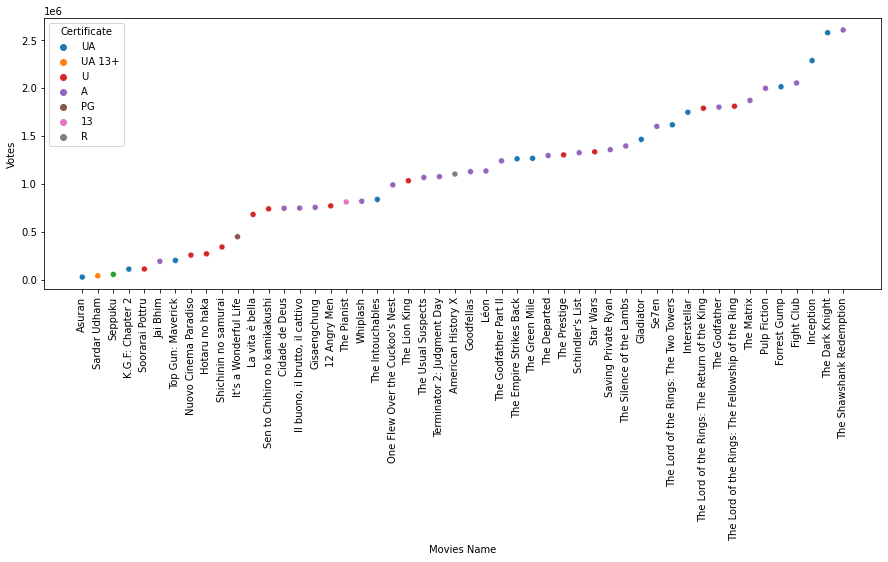

In [329]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=z["Movies Name"],y=z['Votes'],hue=z["Certificate"])
plt.xticks(rotation=90)
plt.show()

# Univariate Graph 
##### generating graphs with one columns

C:\Users\Afzal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


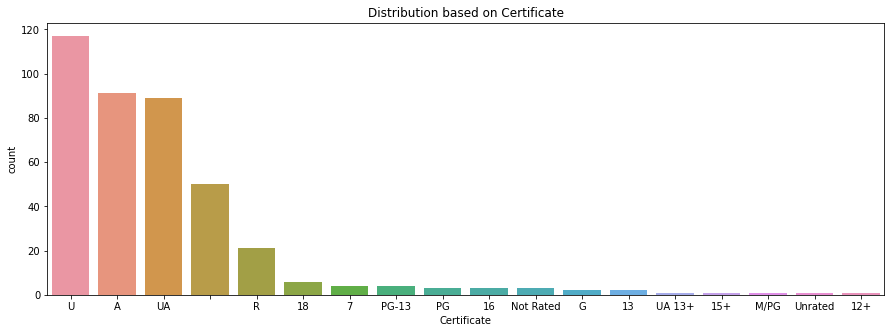

In [330]:
plt.figure(figsize=(15,5))
sns.countplot(page_df["Certificate"],order=page_df["Certificate"].value_counts().index)
plt.title("Distribution based on Certificate")
plt.xlabel("Certificate")
plt.show()

# PIE CHART

### Categories distribution

In [331]:
catogries_count=page_df["Categories Of The Movies"].value_counts().head(10)

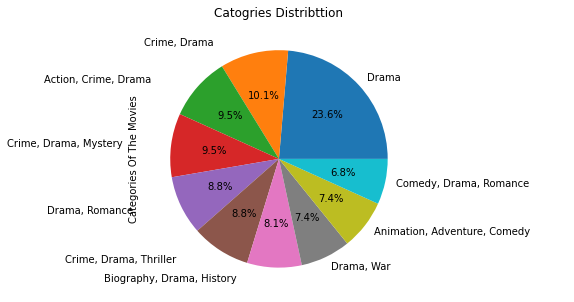

In [332]:
catogries_count.plot(kind="pie",figsize=(10,5),autopct="%1.1f%%")
plt.title("Catogries Distribttion")
plt.show()

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

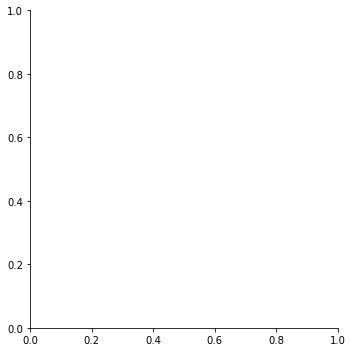

In [333]:
sns.lmplot(x="Total Gross",y="Votes",markers=["o","x","*"],hue="Categories Of The Movies",
           data=page_df.loc[page_df["Categories Of The Movies"].isin(["Comedy","Biography","Animation"])],fit_reg=False)

TypeError: no numeric data to plot

# Line Plot

In [340]:
year_count=df.year.value_counts().head(30)

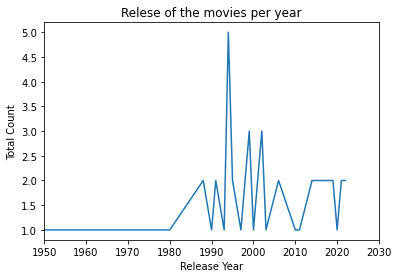

In [344]:
sns.lineplot(data=year_count)
plt.title("Relese of the movies per year")
plt.xlim(1950,2030)
plt.xlabel("Release Year")
plt.ylabel("Total Count")
plt.show()

######                                                              THE END THANK YOU